In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Import Data 

top50 = pd.read_csv('Future50.csv')
top50

,Rank,Restaurant,Location,Sales,YOY_Sales,Units,YOY_Units,Unit_Volume,Franchising
0,1,Evergreens,"Seattle, Wash.",24,130.5%,26,116.7%,1150,No
1,2,Clean Juice,"Charlotte, N.C.",44,121.9%,105,94.4%,560,Yes
2,3,Slapfish,"Huntington Beach, Calif.",21,81.0%,21,90.9%,1370,Yes
3,4,Clean Eatz,"Wilmington, N.C.",25,79.7%,46,58.6%,685,Yes
4,5,Pokeworks,"Irvine, Calif.",49,77.1%,50,56.3%,1210,Yes
5,6,Playa Bowls,"Belmar, N.J.",39,62.9%,76,28.8%,580,Yes
6,7,The Simple Greek,"Blue Bell, Pa.",24,52.5%,36,33.3%,775,Yes
7,8,Melt Shop,"New York, N.Y.",20,39.6%,19,35.7%,1260,Yes
8,9,Creamistry,"Yorba Linda, Calif.",24,36.8%,60,27.7%,465,Yes
9,10,Joella's Hot Chicken,"Louisville, Ky.",29,35.5%,17,30.8%,1930,No


In [4]:
top50.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Rank         50 non-null     int64 
 1   Restaurant   50 non-null     object
 2   Location     50 non-null     object
 3   Sales        50 non-null     int64 
 4   YOY_Sales    50 non-null     object
 5   Units        50 non-null     int64 
 6   YOY_Units    50 non-null     object
 7   Unit_Volume  50 non-null     int64 
 8   Franchising  50 non-null     object
dtypes: int64(4), object(5)
memory usage: 3.6+ KB


- Small data set is clean and has no misisng values 

## EDA

In [25]:
# Explore the most popular locations of restuarants

print(top50.Location.value_counts())
grouped = top50.groupby('Segment_Category').sum().reset_index()
grouped = grouped.sort_values('YOY_Sales', ascending=False).reset_index()
fig = px.pie(grouped.head(10), values='YOY_Sales', names='Segment_Category',template="seaborn")
fig.update_layout(title=' Top 10 Year over Year increase For Segment_Category')
fig.update_traces(textposition='inside', textinfo='value')

New York, N.Y.              8
Columbus, Ohio              3
San Francisco, Calif.       2
Charlotte, N.C.             2
Olivette, Mo.               1
Memphis, Tenn.              1
Denver, Colo.               1
Spartanburg, S.C.           1
San Ramon, Calif.           1
Yorba Linda,  Calif.        1
Washington, D.C.            1
Fairfax, Va.                1
Mechanicsburg, Pa.          1
Louisville, Ky.             1
Fairburn, Ga.               1
Frisco, Texas               1
Plano, Texas                1
Pasadena, Calif.            1
Los Angeles, Calif.         1
Anaheim, Calif.             1
Wilmington, N.C.            1
Orlando, Fla.               1
Orange Park, Fla.           1
Omaha, Neb.                 1
Douglas, Ga.                1
Atlanta, Ga.                1
Seattle, Wash.              1
Doral, Fla.                 1
Belmar,  N.J.               1
Conway, Ark.                1
Kettering, Ohio             1
Medford, Ore.               1
Agoura Hills, Calif.        1
Blue Bell,

0

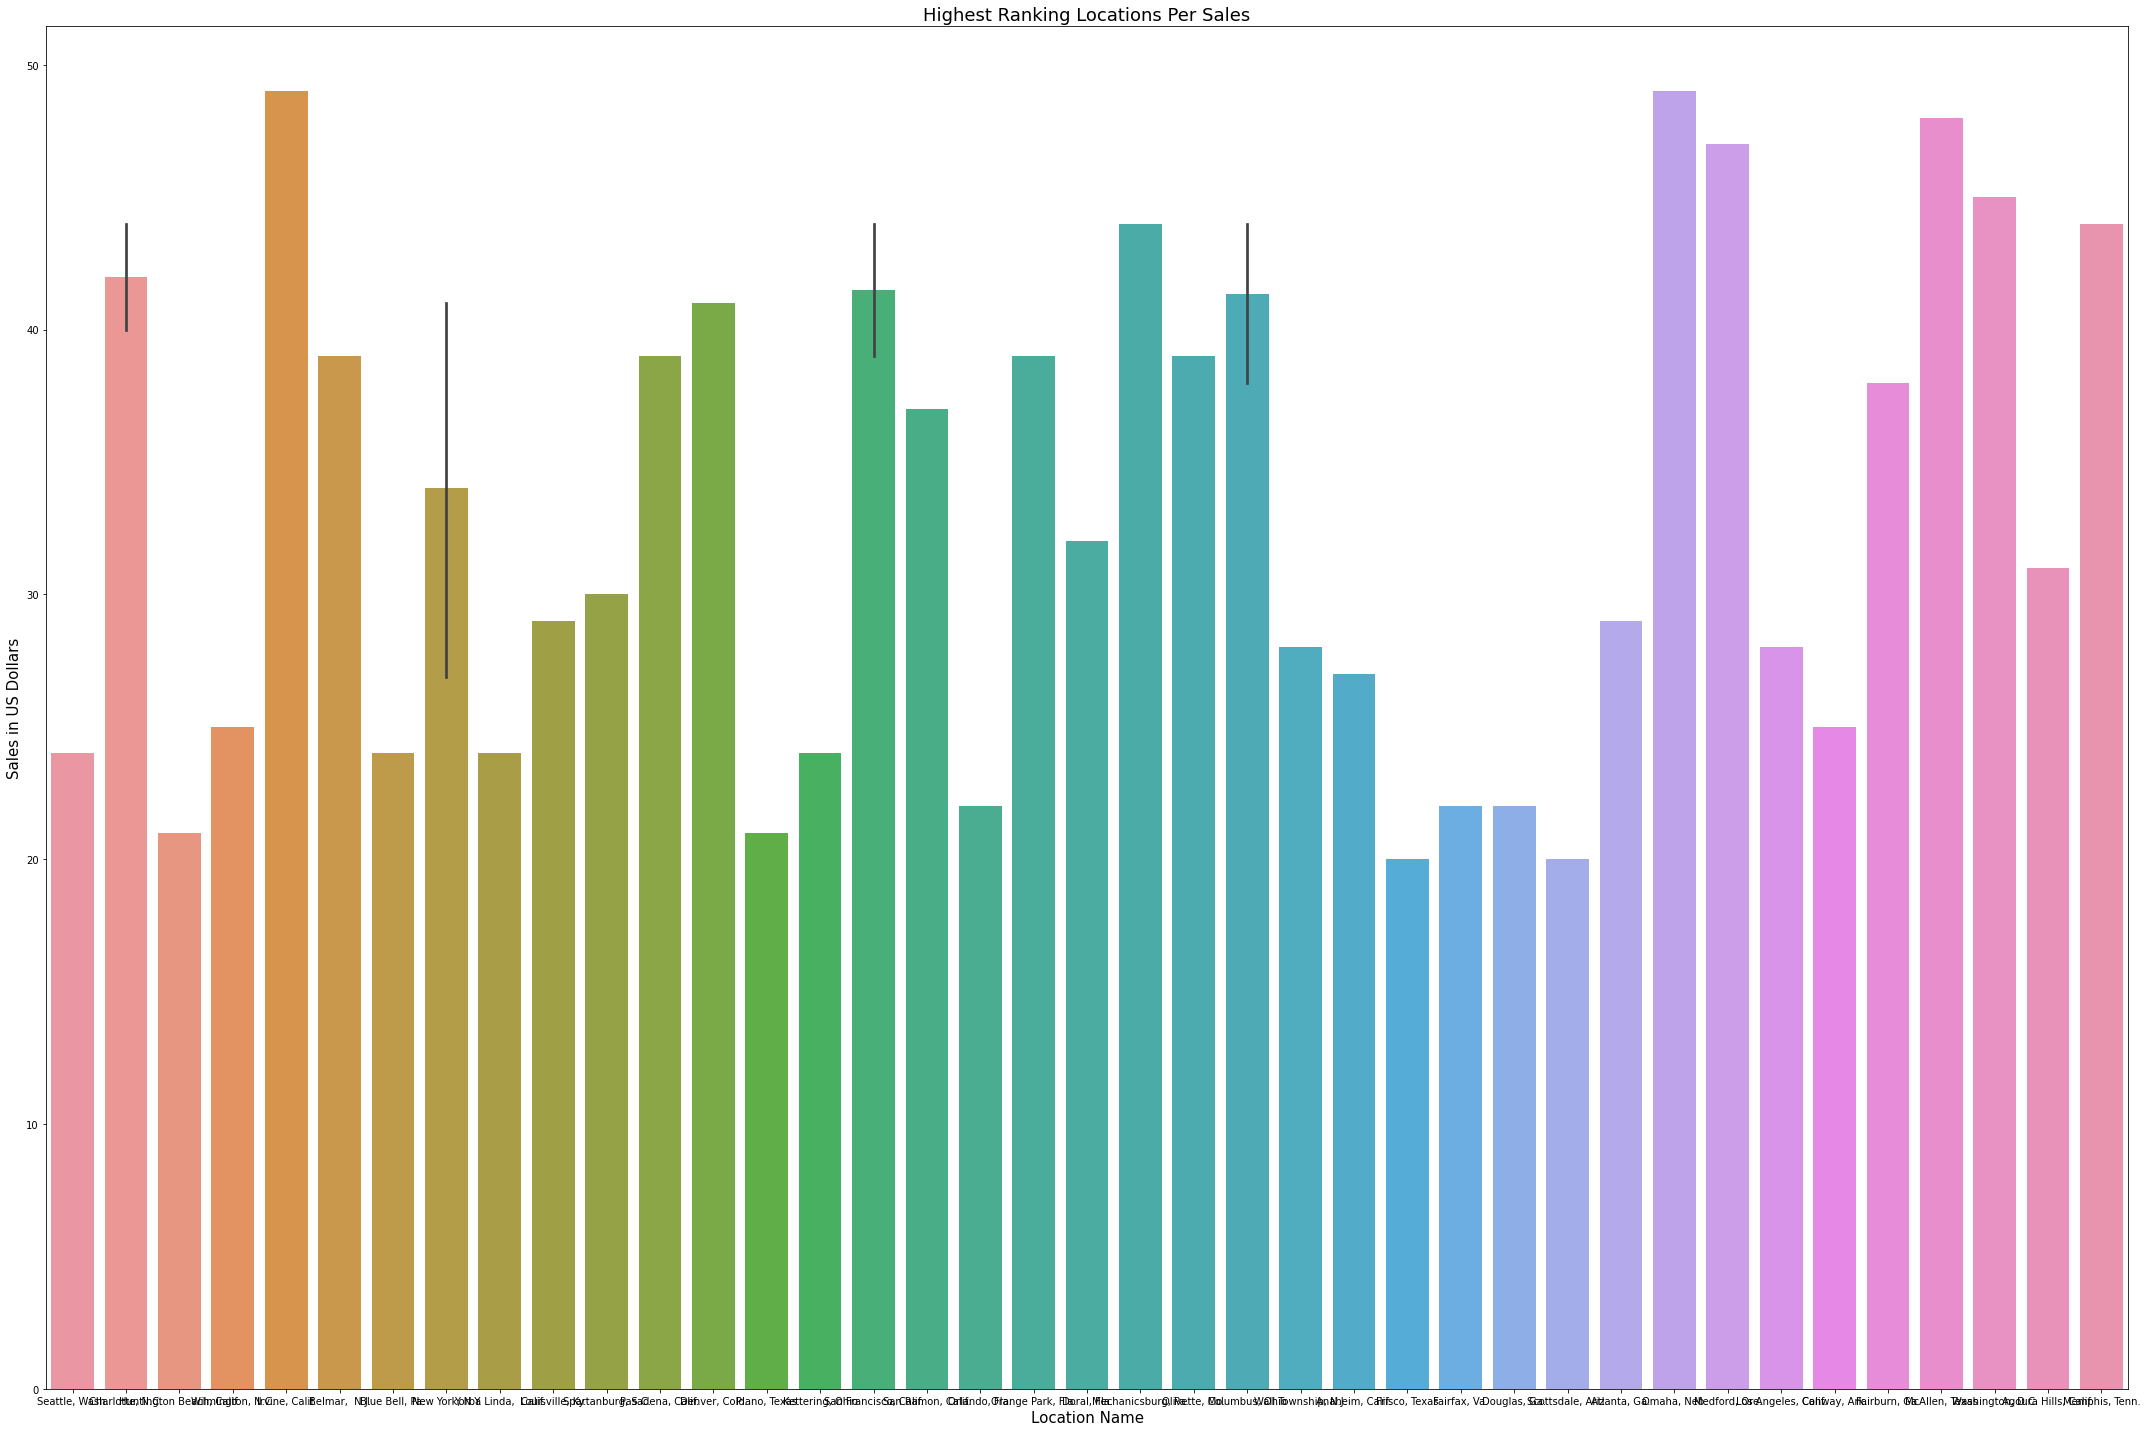

In [18]:
# Group Locations and sales for popular places to eat 

plt.figure(figsize=(30,20))
# make barplot
sns.barplot(x='Location', y="Sales", data=top50)
# set labels
plt.xlabel("Location Name", size=15)
plt.ylabel("Sales in US Dollars", size=15)
plt.title("Highest Ranking Locations Per Sales", size=18)
plt.tight_layout()